In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/mobile_price_prediction.csv')

In [168]:
df.shape

(2000, 21)

In [169]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [170]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [171]:
df.duplicated().sum()

0

In [172]:
X = df.drop(columns='price_range')
y = df['price_range']

In [173]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [174]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

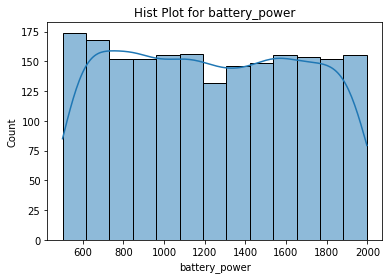

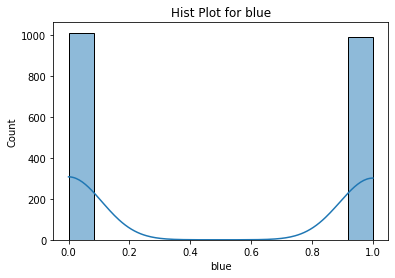

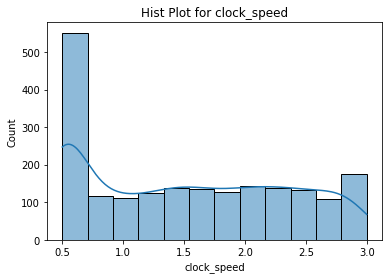

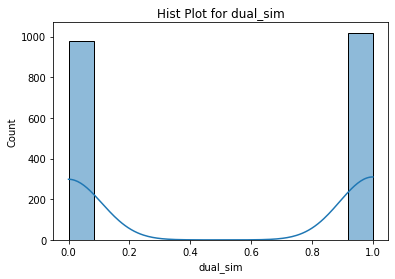

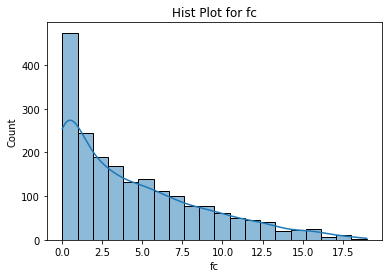

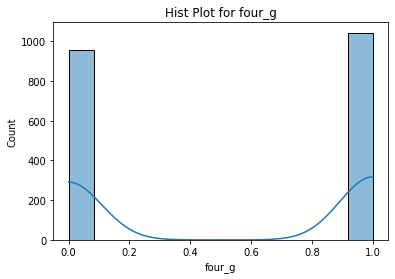

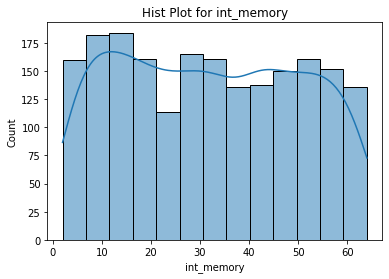

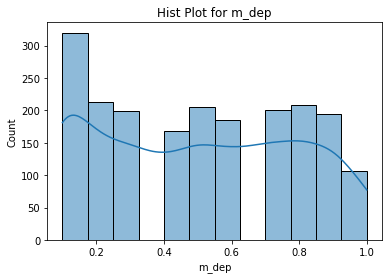

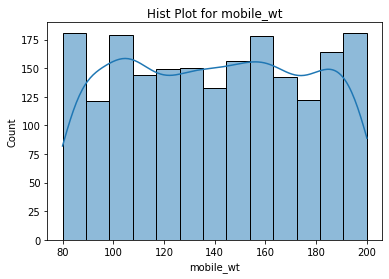

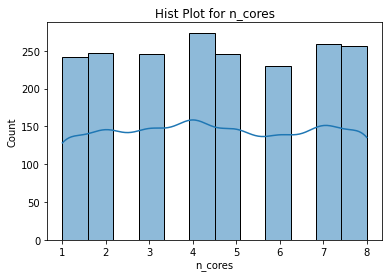

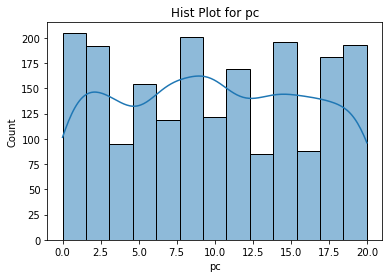

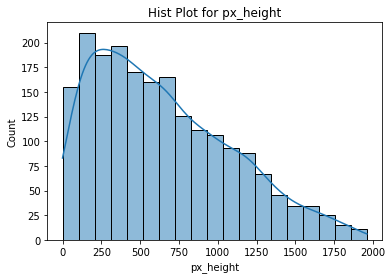

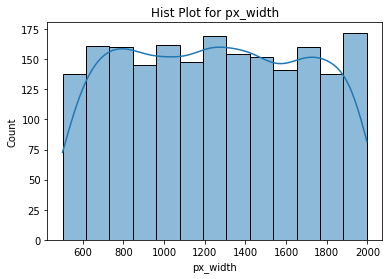

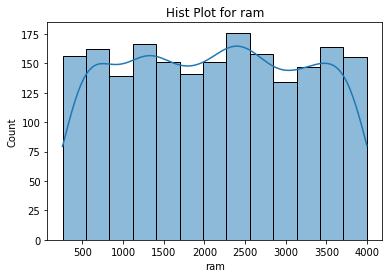

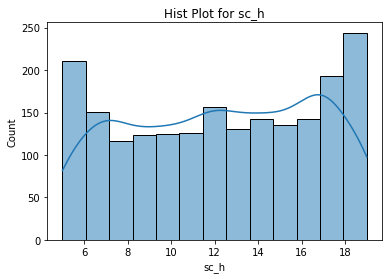

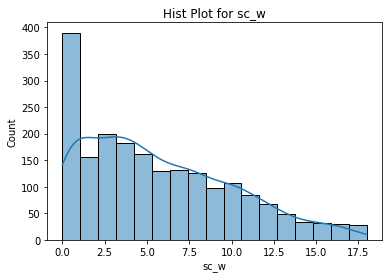

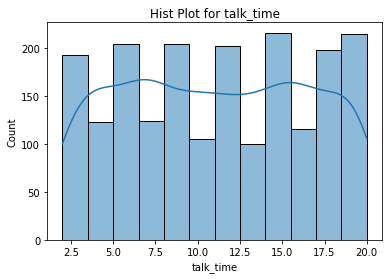

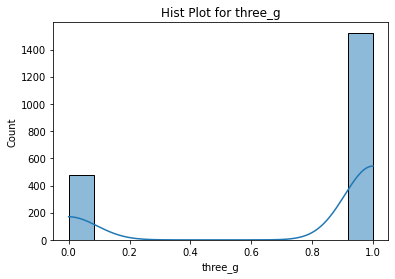

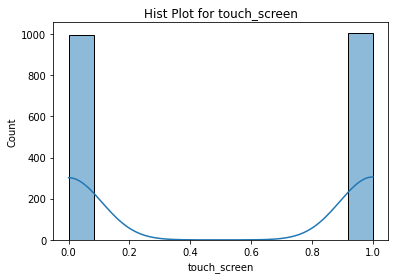

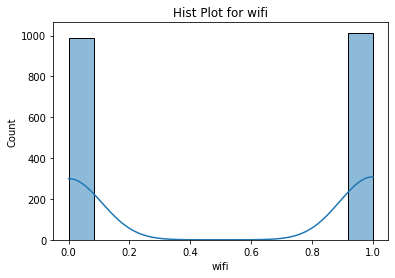

--------------------------------------------------


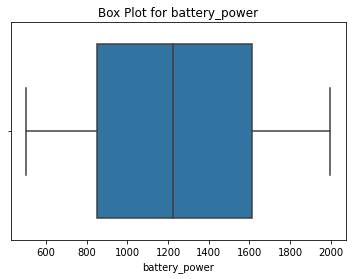

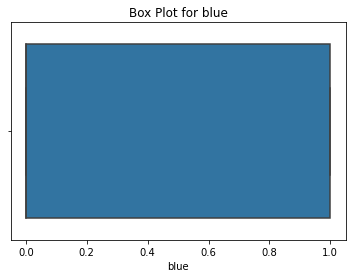

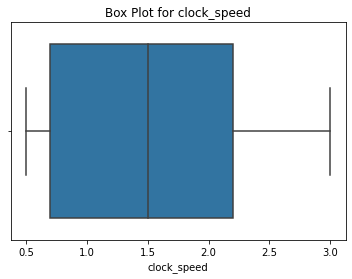

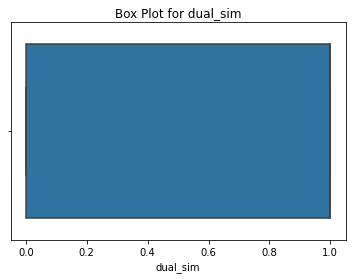

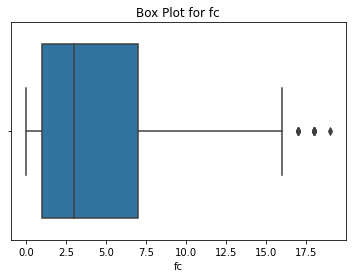

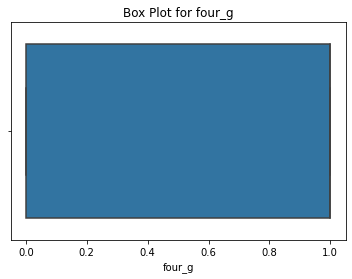

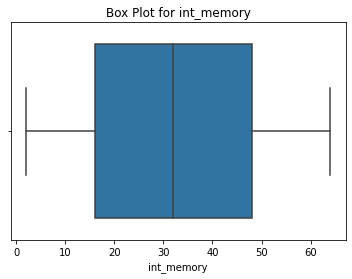

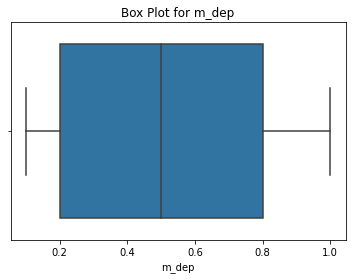

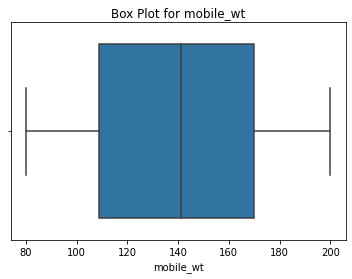

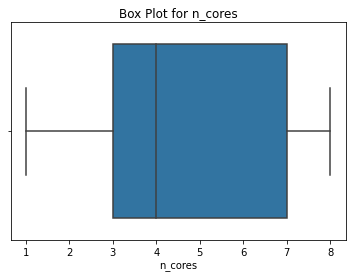

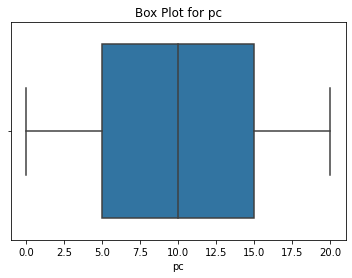

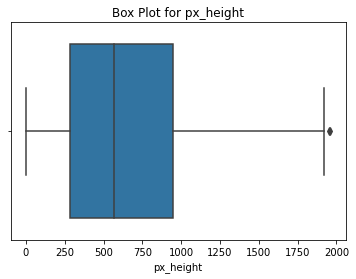

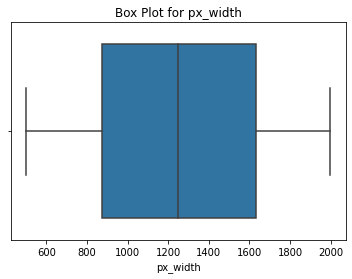

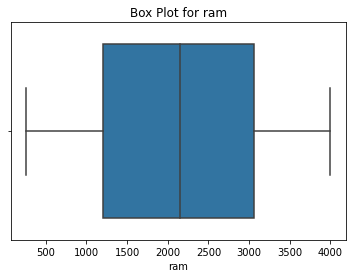

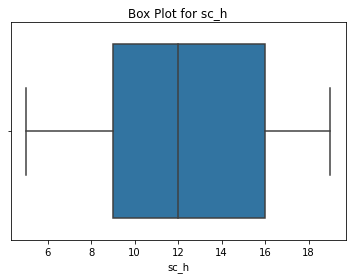

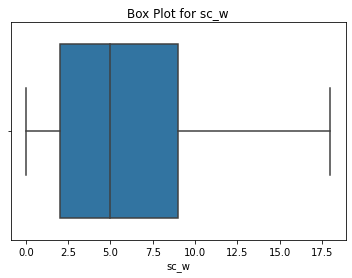

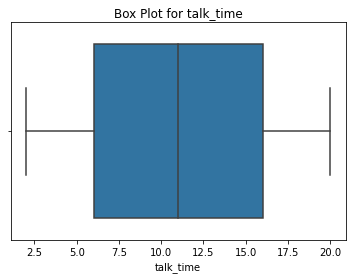

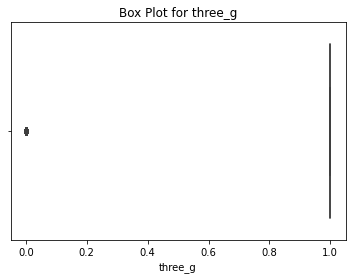

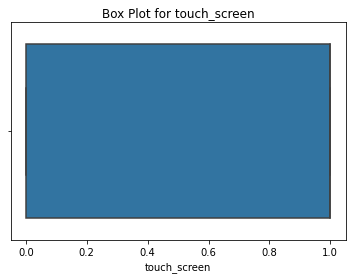

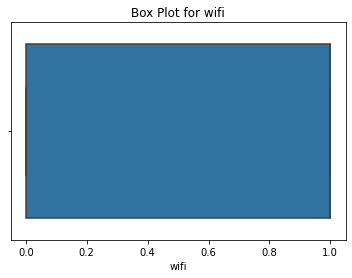

--------------------------------------------------


/home/suhas/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price_range', ylabel='count'>

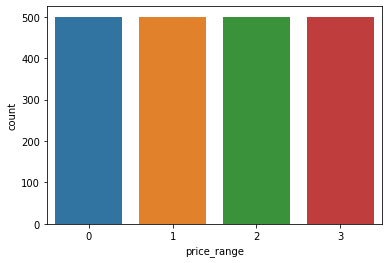

In [175]:
for col in X:
    sns.histplot(data=X,x=col,kde=True)
    plt.title(f"Hist Plot for {col}")
    plt.show()

print('-'*50)

for col in X:
    sns.boxplot(data=X,x=col)
    plt.title(f"Box Plot for {col}")
    plt.show()

print('-'*50)

sns.countplot(df['price_range'])




In [176]:
num_columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

In [177]:
from scipy.stats import f_oneway

significant_num_cols = {}

for col in num_columns:
    group0 = X.loc[y==0,col]
    group1 = X.loc[y==1,col]
    group2 = X.loc[y==2,col]
    group3 = X.loc[y==3,col]
    t_stat,p_value = f_oneway(group0,group1,group2,group3)

    if p_value < 0.05:
        significant_num_cols[col] = {
            't_stat': t_stat,
            'p_value': p_value
        }

    print(f"{col}:{t_stat},p_value:{p_value}")

print(significant_num_cols.keys())





battery_power:31.598157539897333,p_value:5.948688277085545e-20
blue:0.4767677091173067,p_value:0.6984831100963985
clock_speed:0.49370780102855016,p_value:0.6866751621401248
dual_sim:0.4282392855760518,p_value:0.7327869305726169
fc:0.7721819601852685,p_value:0.5095041590900421
four_g:1.0595245262722717,p_value:0.3651552008381206
int_memory:2.9229960794178957,p_value:0.03277693883277447
m_dep:1.5006824396682708,p_value:0.21245949273717601
mobile_wt:3.5943181851536896,p_value:0.013117390712873744
n_cores:2.6254151540860438,p_value:0.04893585053336053
pc:0.8254463576890608,p_value:0.4797489023362932
px_height:19.484841776704783,p_value:1.8860848027538453e-12
px_width:22.62088249061239,p_value:2.1169108878354858e-14
ram:3520.110823895761,p_value:0.0
sc_h:2.2259837359662367,p_value:0.0832499108428466
sc_w:1.670999833167646,p_value:0.17121457684207045
talk_time:1.6288113087355847,p_value:0.18066864736912272
three_g:0.457319749705682,p_value:0.7121506805307874
touch_screen:1.293302231876856,p_

In [178]:
updated_columns = list(significant_num_cols.keys())

In [179]:
X = X[updated_columns]

In [180]:
X.head()

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram
0,842,7,188,2,20,756,2549
1,1021,53,136,3,905,1988,2631
2,563,41,145,5,1263,1716,2603
3,615,10,131,6,1216,1786,2769
4,1821,44,141,2,1208,1212,1411


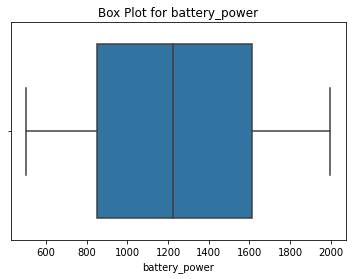

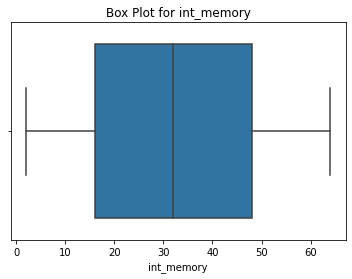

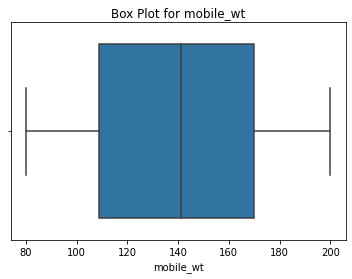

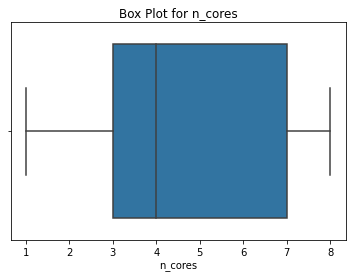

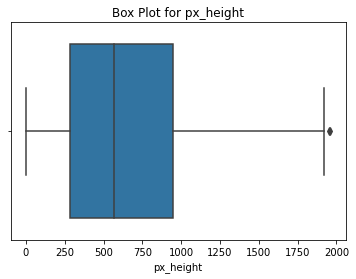

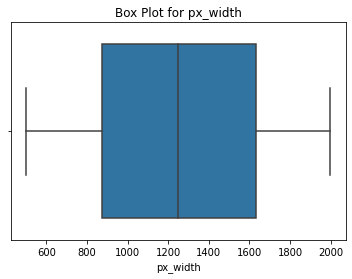

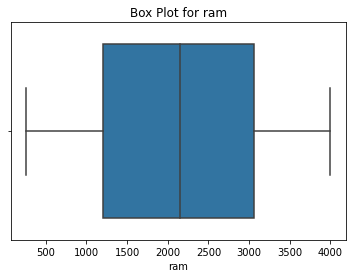

--------------------------------------------------


In [181]:
for col in X:
    sns.boxplot(data=X,x=col)
    plt.title(f"Box Plot for {col}")
    plt.show()

print('-'*50)

In [182]:
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_pipe = Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('std',StandardScaler())
])

prprocess_cols = ColumnTransformer([
    ('pre_process',num_pipe,X.columns),
    
])

In [184]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import joblib
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

algorithms = {
    "random": RandomForestClassifier(),
    "dt": DecisionTreeClassifier(),
    "adb": AdaBoostClassifier(),
    "gdb": GradientBoostingClassifier(),
    "svc": SVC(),
    "knn": KNeighborsClassifier(),
    "lg": LogisticRegression(),
    "xgb": xgb.XGBClassifier()
}

for name,algo in algorithms.items():
    model = Pipeline([
    ('pipeline',prprocess_cols),
    ('algo',algo)

    ])

    model.fit(X_train,y_train)

    joblib.dump(model,f"{name}.pkl")

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    clf_report = classification_report(y_test,y_pred)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    cv_score = cross_val_score(model,X,y,scoring='accuracy',cv=5)
    cv_mean = cv_score.mean()

    print(f"{name}")
    print(f"Accuracy:{accuracy}")
    print(f"clf_report:\n{clf_report}")
    print(f"cnf_matrix:\n{cnf_matrix}")
    print(f"cv_score:{cv_score}")
    print(f"cv_mean:{cv_mean}")
    print(f"-"*50)






random
Accuracy:0.915
clf_report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.88      0.93      0.90        91
           2       0.85      0.89      0.87        92
           3       0.96      0.89      0.93       112

    accuracy                           0.92       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.92      0.92      0.92       400

cnf_matrix:
[[ 99   6   0   0]
 [  3  85   3   0]
 [  0   6  82   4]
 [  0   0  12 100]]
cv_score:[0.92   0.925  0.91   0.8975 0.895 ]
cv_mean:0.9095000000000001
--------------------------------------------------
dt
Accuracy:0.8425
clf_report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       105
           1       0.74      0.86      0.80        91
           2       0.77      0.74      0.76        92
           3       0.90      0.89      0.90       112

    accuracy   

/home/suhas/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/suhas/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/suhas/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/suhas/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/suhas/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/suhas/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb
Accuracy:0.9125
clf_report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       105
           1       0.85      0.98      0.91        91
           2       0.87      0.84      0.85        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400

cnf_matrix:
[[ 98   7   0   0]
 [  1  89   1   0]
 [  0   9  77   6]
 [  0   0  11 101]]
cv_score:[0.925  0.925  0.91   0.9225 0.9075]
cv_mean:0.9179999999999999
--------------------------------------------------
